## Supervised Machine Learning Classifications
In this tutorial I will apply supervised machine learning classifications to the canser data sets in order to determine if tested data has heart diseases or not. I will use KNN classification, decision tree classification, random forest classification,Support vector machine, logistig regression and naive bayes algorithms. I will show also how to determine accuracy of the each classificaiton and make evaluation by using confusion matrix.

1. [EDA(Exploratory Data Analaysis)](#1)
2. [Logistic Regression Classification](#2)
3. [KNN Classification](#3)
4. [Decision Tree Classification](#4)
5. [Random Forest Classification](#5)
6. [Support Vector Machine(SVM)](#6)
7. [Naive Bayes Classification](#7)
8. [Confusion Matrix Comparision with Visualization](#8)
9. [Conclusion](#9)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


<a id="1"></a> <br>
1. EDA(Exploratory Data Analaysis)

EDA is very important to look at what is inside the data. For example, if there is object(string) in the data, we need to change it to integer or float because sci-learn is not handling with object data. There are also missdata in the datasets, we need to handle them.

In [2]:
# Read the data and assign it as df
df=pd.read_csv("heart.csv")

In [3]:
# Let's have a quick look into data.This code shows first 5 rows and all columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# If there is unknown,missing or unproper data, this codes shows the number of them
# We can also learn about features such as data type of the features
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# statistical data is important to learn about balance inside or among the features.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


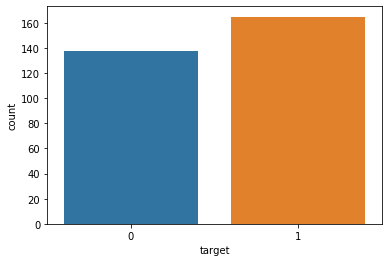

In [6]:
# Seaborn countplot gives the number of data in the each class
sns.countplot(x="target", data=df)


<a id="2"></a> <br>
2.Logistic Regression Classification

It is very powerfull algorithm to use with binary classification.

In [7]:
# y has target data (clases) such as 1 and 0. 
y = df.target.values
# This means that take target data out from the datasets and assign them to x_data variable
x_data = df.drop(["target"],axis=1)

In [8]:
#Normalization is used to handle with unbalanced features
#This gives the values to the features which range from zero to 1.
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [9]:
#The data is splited into two part for training and testing
#Here test_size=0.2 means %20 is splited as test_data
#we need to give any number to random_state in order to split data in the same way when it is reruned
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [10]:
# Build Linear Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test,y_test)))

lr_score=lr.score(x_test,y_test)


test accuracy 0.8524590163934426


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# Here we use confusion matrix to evaluate the linear regression algorithm
from sklearn.metrics import confusion_matrix
y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

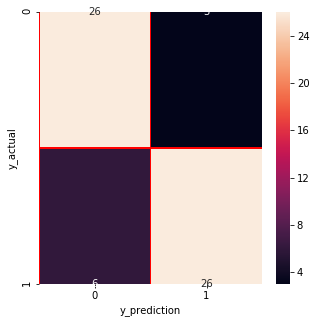

In [12]:
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()


<a id="3"></a> <br>

3.KNN Classification

In this method we need to choose k value.It means that we chose k number of points of classes which are nearest to the out test point. We can call this small data set. We count the number of classes in the small dataset and determine the highest number of class. Finally we can say our test point belongs to the class.

While choosing k number we have to be carefull because small k value causes overfitting while big k value causes underfitting.

Coding is the same for all supervised classes and we jus need to change the last part of the code.

In [13]:
# KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)


 3 nn score: 0.8360655737704918


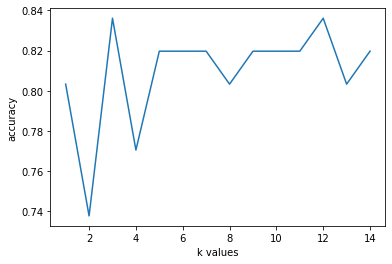

In [14]:
# We can determine best k values with plotting k values versus accuracy
# Here we give values to k from 1 to 15 and calculate the accuracy each time,then plot them.
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()


In [15]:
# Here we use confusion matrix to evaluate the KNN Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

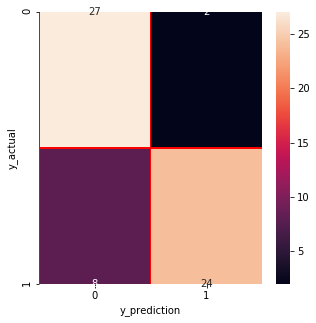

In [16]:
# Heatmap visualization of cunfusion matrix of the KNN Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

<a id="4"></a> <br>
4.Decision Tree Classification

"Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed".

According to ınformation entropy, we can determine which feature is the most important. And we put the most important one to the top of the related tree.

Decision tree classification can be used for both binary and multi classes

Coding is the same for all supervised classes and we jus need to change the last part of the code.

In [17]:
# Build Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)

score:  0.7540983606557377


In [18]:
# Here we use confusion matrix to evaluate the Decision Tree Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)


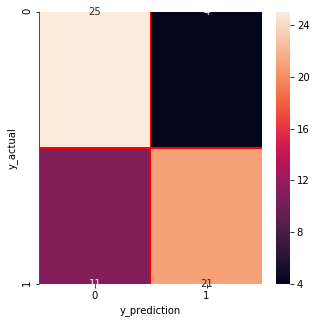

In [19]:
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


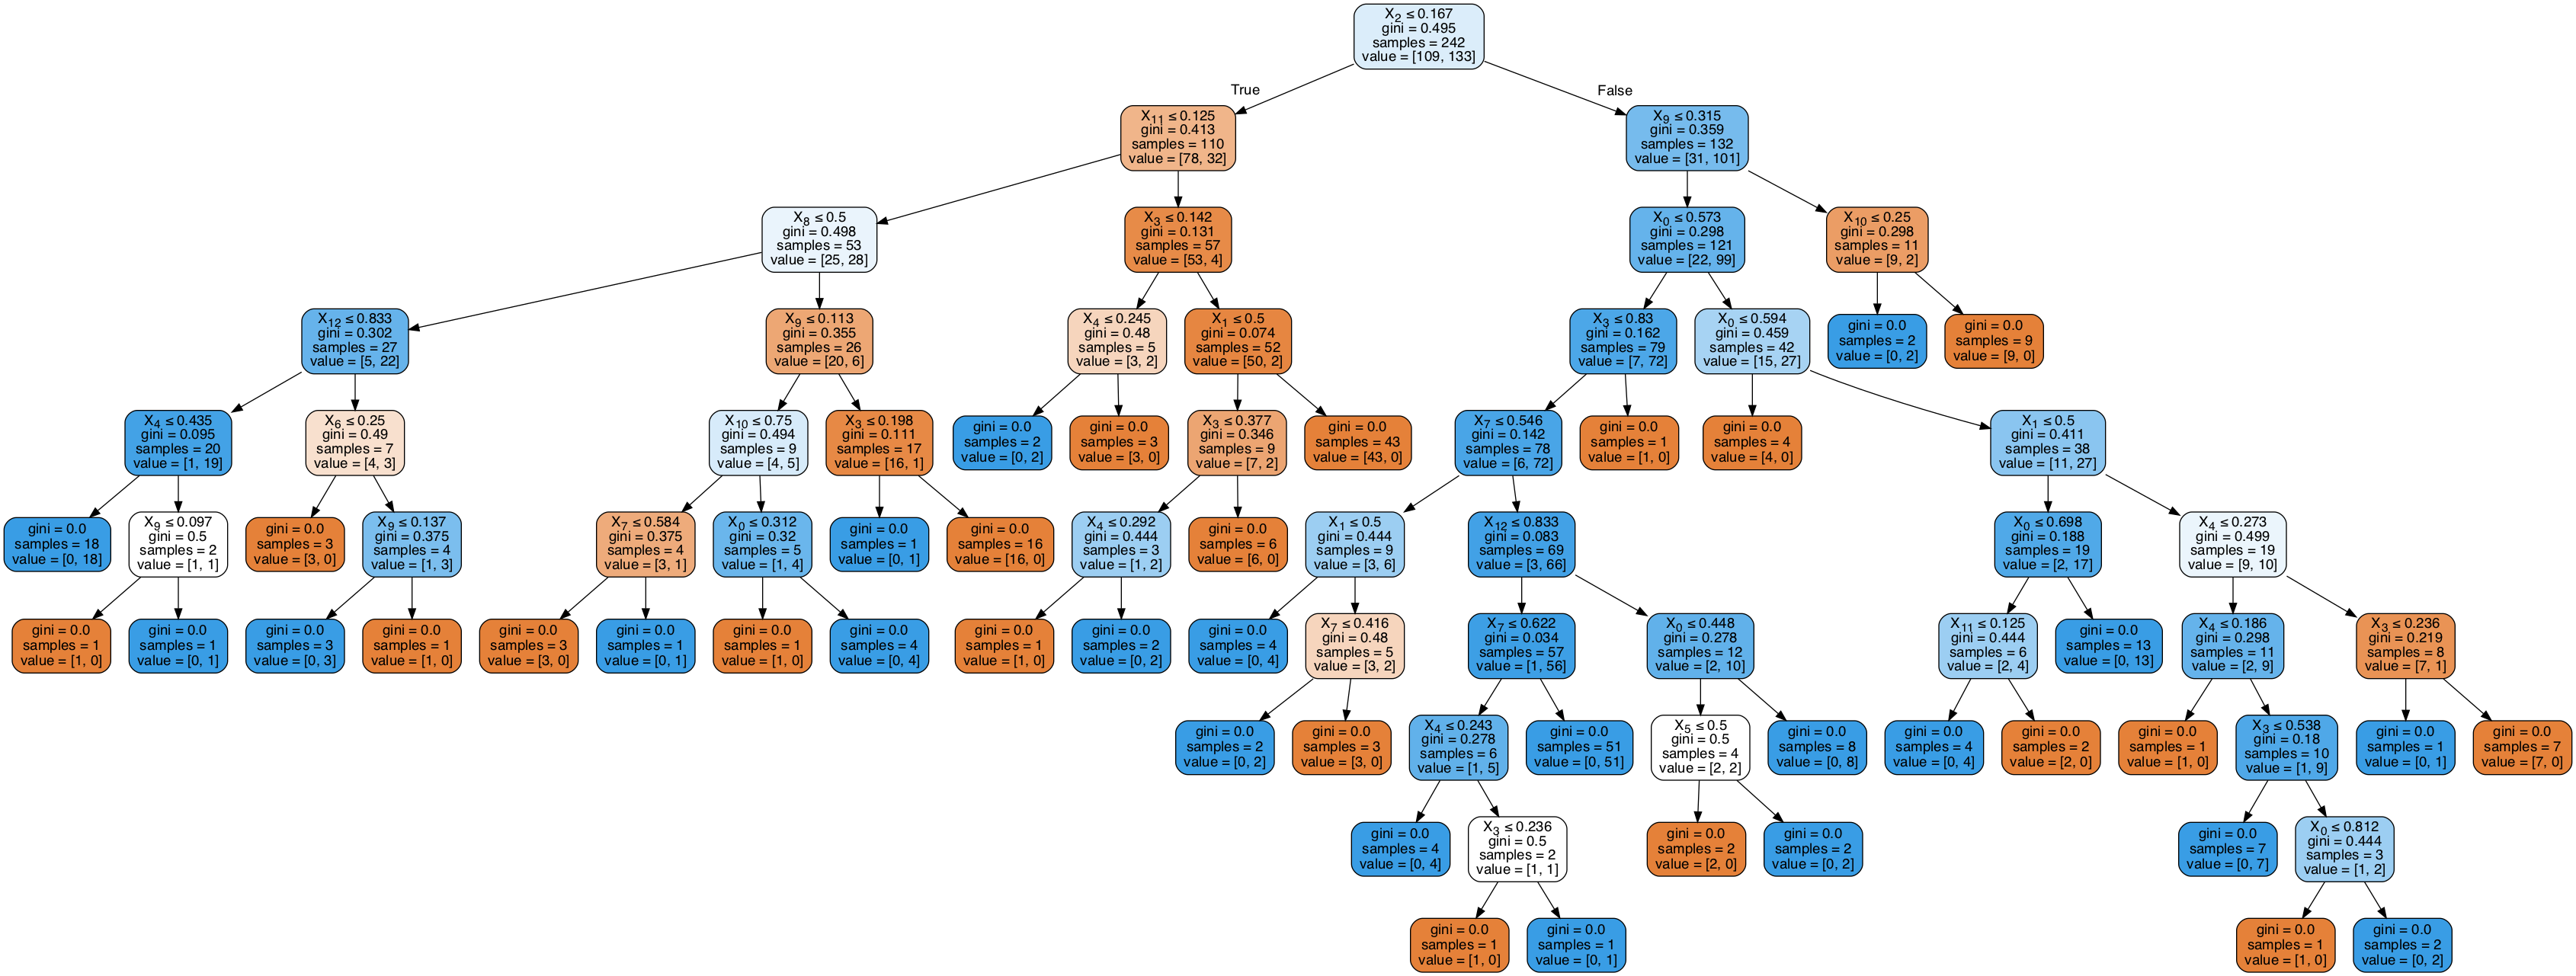

In [20]:
# Visulization of the Decision Tree Classification Model
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




<a id="5"></a> <br>
5.Random Forest Classification

This methods basically use multiple number of decision trees and take the avarage of the results of these decision trees. And we use this avarage to determine the class of the test point.

This is one of ensamble method which uses multiple classes to predict the target, and very powerfull technique.

In [21]:
# Build Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
# n_estimators = 100 means this model will use 100 subsets.
rf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

rf_score = rf.score(x_test,y_test)


random forest algo result:  0.8360655737704918


In [22]:
# Here we use confusion matrix to evaluate the Random Forest Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

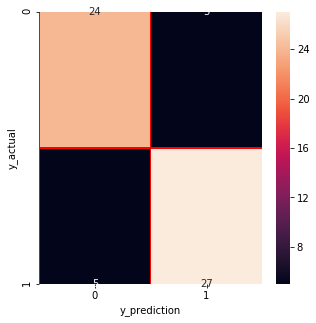

In [23]:
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

<a id="6"></a> <br>
6.Support Vector Machine (SVM)

SVM is used fo both regression and classification problems, but generally for classification.
There is a C parameter inside the SVM algoritma and the default value of C parameter is 1. If C is small, it causes the misclassification. If C is big, it causes ovetfitting. So we need to try C parameter to find best value.


In [24]:
# Build Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)

print accuracy of svm algo:  0.8688524590163934


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

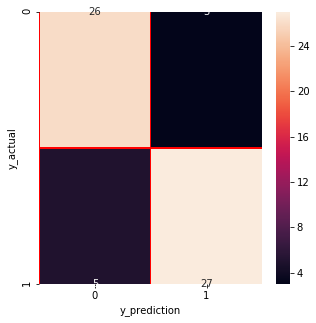

In [26]:
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

<a id="7"></a> <br>
7.Naive Bayes Classification

"Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features."

Here we basically determine similarity range and calculate probabilty of the X point in the A feature P(A_feature|x).

In [27]:
# Build Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

nb_score = nb.score(x_test,y_test)
 

print accuracy of naive bayes algo:  0.8688524590163934


In [28]:
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = nb.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

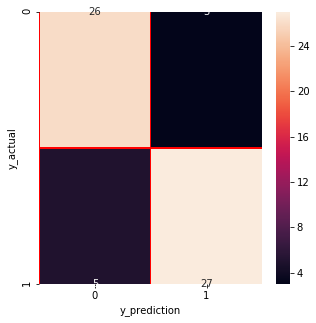

In [29]:
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

<a id="8"></a> <br>
8.Confusion Matrix Comparision with Visualization

Here we will visualize all confusion matrices of all above classifiers.

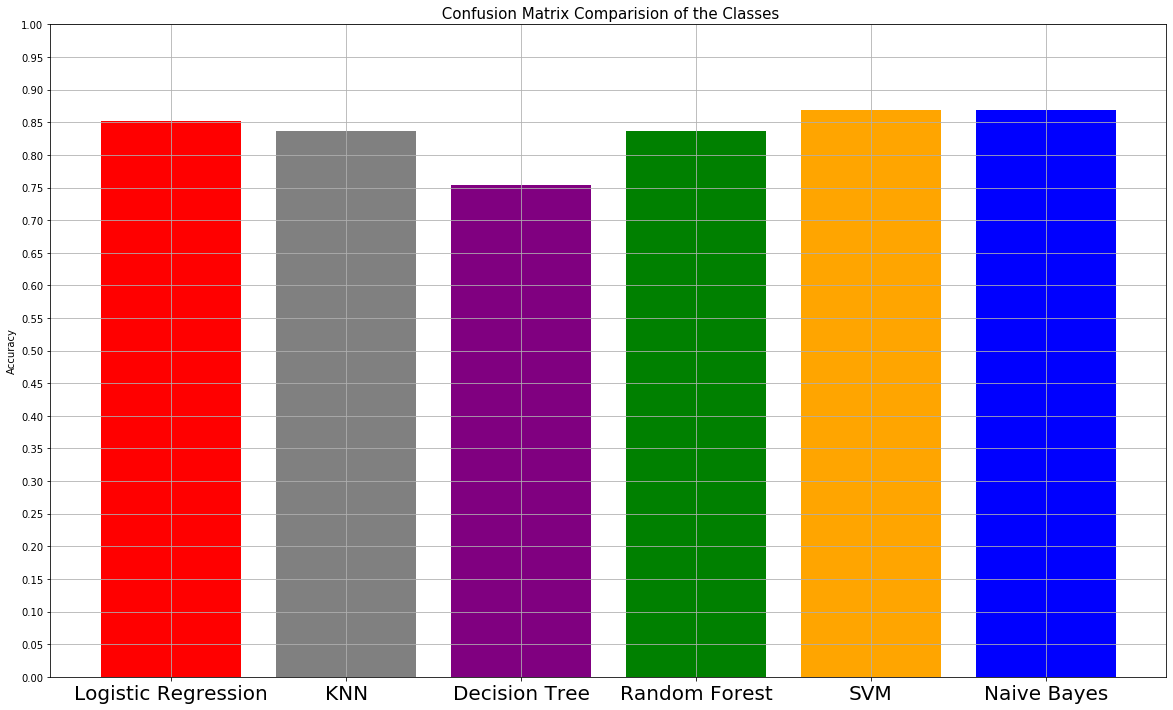

In [34]:
class_name = ("Logistic Regression","KNN","Decision Tree","Random Forest","SVM","Naive Bayes")
class_score = (lr_score,knn_score,dt_score,rf_score,svm_score,nb_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(20,12))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.grid()
plt.title(" Confusion Matrix Comparision of the Classes",fontsize=15)
plt.savefig('graph.png')
plt.show()


<a id="9"></a> <br>
9.Conclusion

In this tutorial supervised machine learning algorithms are used to build model which determines if patient has heart disease. Confusiion matrix of each classifier is found and ploted as heatmap by using seaborn algorithm. 

If you have suggestion, advice or question, please do not hesitate to share with me.